In [14]:
!pip install pandas
!pip install numpy
!pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


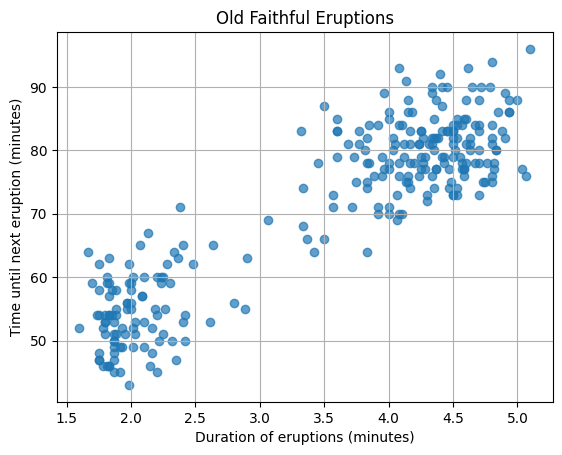

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

faithful_data = pd.read_csv('faithful.csv')
x_data = np.asarray(faithful_data['eruptions'])
y_data = np.asarray(faithful_data['waiting'])
plt.scatter(x_data, y_data, alpha=0.7) 
plt.title('Old Faithful Eruptions')
plt.xlabel('Duration of eruptions (minutes)')
plt.ylabel('Time until next eruption (minutes)')
plt.grid(True)
plt.show()

## 1 (a): 
I think there is a relationship between eruption time and waiting time. Looking at the graph, shorter eruptions tend to have shorter waiting times and longer eruptions tend to have longer waits, so it is a linear positive relationship.

3.4877830882352936 70.8970588235294


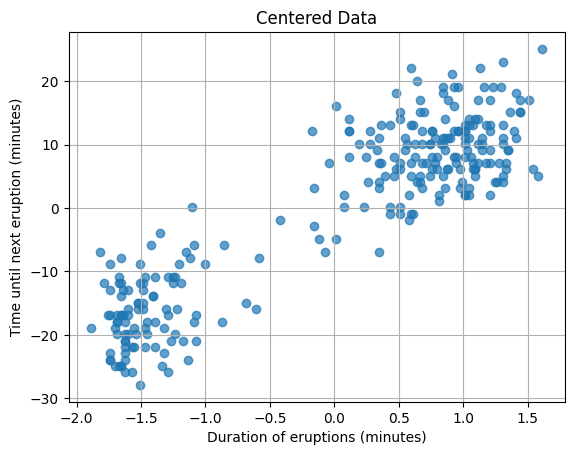

In [16]:
# 1(b):
mean_x = x_data.mean()
mean_y = y_data.mean()
print(mean_x, mean_y)

centered_x = x_data - mean_x
centered_y = y_data - mean_y
plt.scatter(centered_x, centered_y, alpha=0.7)  # Alpha for better visualization
plt.title('Centered Data')
plt.xlabel('Duration of eruptions (minutes)')
plt.ylabel('Time until next eruption (minutes)')
plt.grid(True)
plt.show()


# 1(b): The mean of the eruption time is 3.488 and the mean of the waiting time is 70.897

In [17]:
dot_product = np.sum(centered_x * centered_y)
denom = np.sqrt(np.sum(centered_x**2) * np.sum(centered_y**2))
correlation = dot_product / denom
correlation

0.9008111683218131

# 1(c): The correlation value of 0.901 matches what I would expect from the plot since there's a clear correlation between how long an eruption takes and the waiting time for the next eruption.

10.729641395133525 33.47439702275336


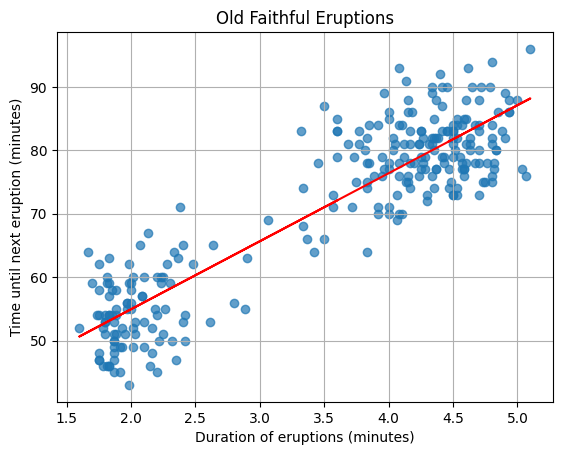

In [18]:
slope = dot_product / np.sum(centered_x**2)
intercept = mean_y - (slope * mean_x)
print(slope, intercept)

y = slope * x_data + intercept

plt.scatter(x_data, y_data, alpha=0.7)  # Alpha for better visualization
plt.plot(x_data, y, color='red')
plt.title('Old Faithful Eruptions')
plt.xlabel('Duration of eruptions (minutes)')
plt.ylabel('Time until next eruption (minutes)')
plt.grid(True)
plt.show()

# 1(d): The value and the sign of the slope is consistent with the correlation, they are both positive.

In [19]:
sample_y = slope * 2.2 + intercept

# 1(e): Based on my regression analysis, if you time an eruption for 2.2 minutes, you can expect to wait around 57 minutes until the next eruption

In [20]:
predicted_y = slope * x_data + intercept

SS_res = np.sum((y_data - predicted_y) ** 2)
SS_tot = np.sum(centered_y ** 2)

R_squared = 1 - (SS_res / SS_tot)
SS_res, SS_tot, R_squared

(9443.387046216787, 50087.117647058825, 0.8114607609733095)

1(f): The proportion of variance explained by your regression is 0.8114607609733095

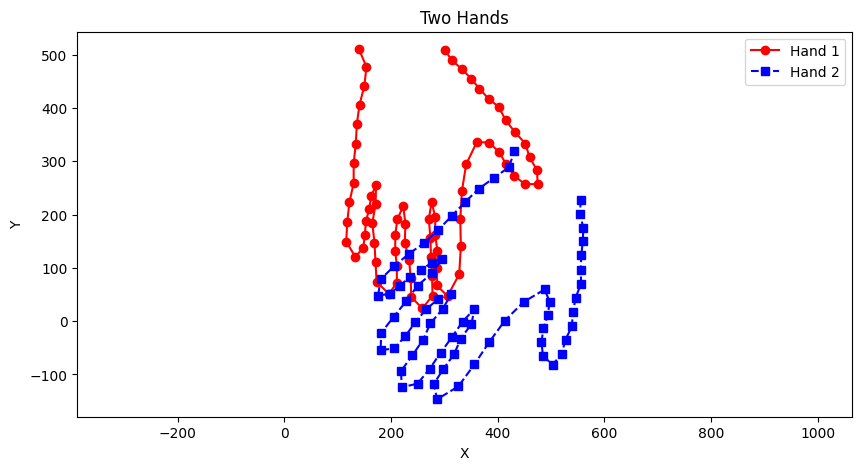

In [21]:
## 2) A)

hand1 = pd.read_csv('hand1.dat', header=None, sep =',', names =['X', 'Y'])
hand2 = pd.read_csv('hand2.dat', header=None, sep =',', names =['X', 'Y'])

hand1_x = np.asarray(hand1['X'])
hand1_y= np.asarray(hand1['Y'])

hand2_x = np.asarray(hand2['X'])
hand2_y= np.asarray(hand2['Y'])

plt.figure(figsize=[10, 5])
plt.plot(hand1_x, hand1_y, 'o-', color='red', label='Hand 1')  
plt.plot(hand2_x, hand2_y, 's--', color='blue', label='Hand 2') 
plt.title('Two Hands')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()


In [22]:
# B)
A1 = np.asarray(hand1)
A2 = np.asarray(hand2)
A1T = A1.T

AT1A2 = A1T @ A2
print(AT1A2)

U, S, Vh = np.linalg.svd(AT1A2, full_matrices=True)
R = U @ Vh
print(R)

theta = np.arctan2(R[1, 0], R[0, 0])
theta_degrees = np.degrees(theta)
theta_degrees

[[7314972.67717428  345514.2986836 ]
 [6694258.16273607 1352442.26575311]]
[[ 0.80673157 -0.59091807]
 [ 0.59091807  0.80673157]]


36.22218448325579

The angle of rotation between the two hands is 36.22 degrees

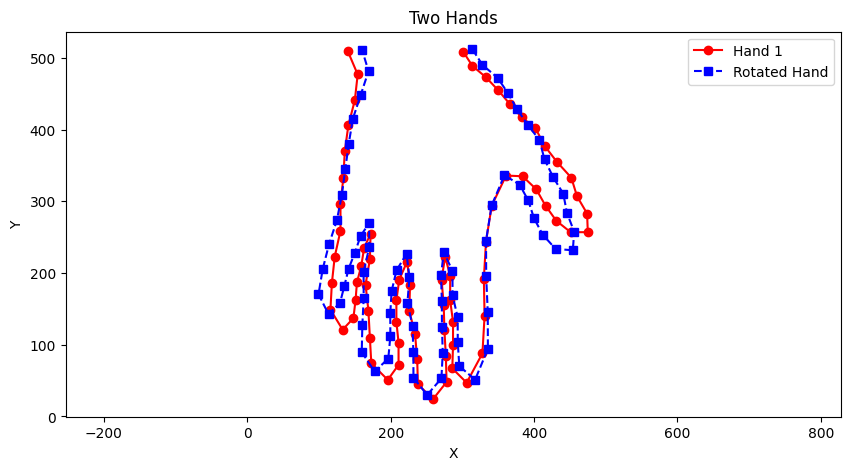

In [23]:
# C)

A2_rotated = A2 @ R.T
A2_rotated
plt.figure(figsize=[10, 5])
plt.plot(hand1_x, hand1_y, 'o-', color='red', label='Hand 1')  
plt.plot(A2_rotated[:, 0], A2_rotated[:, 1], 's--', color='blue', label='Rotated Hand') 
plt.title('Two Hands')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()


Looking at the graph, hand1 and hand2 approximately align with each other after rotation.

# 3(a)

Model 2 fits the data better because the data in the figure shows a curved trend, not a striaght line. Model 1 assumes a linear relationship which doesn't capture the curve in the data distribution, while model 2 has a quadratic term that enables the model to bend to follow the pattern shown by the points.

## 3(b)
$$ SSE = E(a, b, c) = \sum_{i=1}^{n} (y_i - (ax_i^2 + bx_i + c))^2$$

We minimize this energy function with respect to $a$ by taking the derivative and setting it to zero:

Apply chain rule:
$$  \frac{\partial E}{\partial a} = 2 \sum_{i=1}^{n}(y_i - ax_i^2 - bx_i -c) * -(x_i)^2 $$
$$  \frac{\partial E}{\partial a} = -2 \sum_{i=1}^{n} x_i^2(y_i - ax_i^2 - bx_i -c) $$

Setting the derivative equal to zero for minimization gives us:

$$
-\sum_{i=1}^{n} x_i^2(y_i - ax_i^2 - bx_i - c) = 0
$$


After distributing $-x_i^2$ to each term inside the parentheses, the expression becomes:

$$
-\sum_{i=1}^{n} x_i^2y_i + a\sum_{i=1}^{n} x_i^4 + b\sum_{i=1}^{n} x_i^3 + c\sum_{i=1}^{n} x_i^2 = 0
$$

$$
a\sum_{i=1}^{n} x_i^4 + b\sum_{i=1}^{n} x_i^3 + c\sum_{i=1}^{n} x_i^2 = \sum_{i=1}^{n} x_i^2y_i
$$

Since b and c are variables, we derive with respect to b and c in separate equations:

$$
\frac{\partial E}{\partial b} = \frac{\partial}{\partial b} \sum_{i=1}^{n} (y_i - ax_i^2 - bx_i - c)^2
$$

Applying the chain rule for differentiation, we get:

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n} 2(y_i - ax_i^2 - bx_i - c)(-x_i)
$$

$$
\frac{\partial E}{\partial b} = -2 \sum_{i=1}^{n} x_i(y_i - ax_i^2 - bx_i - c)
$$

$$
-2 \sum_{i=1}^{n} x_i(y_i - ax_i^2 - bx_i - c) = 0
$$

Distribute and simplify:


$$
-\sum_{i=1}^{n} x_iy_i + a\sum_{i=1}^{n} x_i^3 + b\sum_{i=1}^{n} x_i^2 + c\sum_{i=1}^{n} x_i = 0
$$

$$
a\sum_{i=1}^{n} x_i^3 + b\sum_{i=1}^{n} x_i^2 + c\sum_{i=1}^{n} x_i = \sum_{i=1}^{n} x_iy_i
$$

Now for c:

$$
\frac{\partial E}{\partial c} = \frac{\partial}{\partial c} \sum_{i=1}^{n} (y_i - ax_i^2 - bx_i - c)^2
$$

Applying chain rule:

$$
= \sum_{i=1}^{n} 2(y_i - ax_i^2 - bx_i - c)(-1)
$$

$$
= -2 \sum_{i=1}^{n} (y_i - ax_i^2 - bx_i - c)
$$

Set derivate to zero for minimization:

$$
-2 \sum_{i=1}^{n} (y_i - ax_i^2 - bx_i - c) = 0
$$

Distribute and simplify:

$$
a\sum_{i=1}^{n} x_i^2 + b\sum_{i=1}^{n} x_i + cn= \sum_{i=1}^{n} y_i
$$

We now have a system of linear equations we've derived from a, b, c which we can translate to matrix form.
1. $ a\sum_{i=1}^{n} x_i^4 + b\sum_{i=1}^{n} x_i^3 + c\sum_{i=1}^{n} x_i^2 = \sum_{i=1}^{n} x_i^2y_i $
2. $ a\sum_{i=1}^{n} x_i^3 + b\sum_{i=1}^{n} x_i^2 + c\sum_{i=1}^{n} x_i = \sum_{i=1}^{n} x_iy_i $
3. $ a\sum_{i=1}^{n} x_i^2 + b\sum_{i=1}^{n} x_i + cn= \sum_{i=1}^{n} y_i $

$$
\begin{bmatrix}
    \sum x_i^4 & \sum x_i^3 & \sum x_i^2 \\
    \sum x_i^3 & \sum x_i^2 & \sum x_i \\
    \sum x_i^2 & \sum x_i   & n
\end{bmatrix}
\begin{bmatrix}
    a \\
    b \\
    c
\end{bmatrix}
=
\begin{bmatrix}
    \sum x_i^2 y_i \\
    \sum x_i y_i \\
    \sum y_i
\end{bmatrix}
$$

Applying Cramer's Rule:

Let A = $ \begin{bmatrix}
    \sum x_i^4 & \sum x_i^3 & \sum x_i^2 \\
    \sum x_i^3 & \sum x_i^2 & \sum x_i \\
    \sum x_i^2 & \sum x_i   & n
\end{bmatrix} $

Let $D_a$ = $ \begin{bmatrix}
    \sum x_i^2 y_i & \sum x_i^3 & \sum x_i^2 \\
    \sum x_i y_i  & \sum x_i^2 & \sum x_i \\
    \sum y_i & \sum x_i   & n
\end{bmatrix} $

The solution for $a$ can be found using the determinant of the matrices:
$$
a = \frac{\text{det}(D_a)}{\text{det}(A)}
$$



# 4) 
The criteria is that we choose the mean for each class in the training data, and we gather the points closest to the mean point to represent that class, and we throw away the other training data points.



# Algorithm

Step 1: For each class, choose a subset of the training data in this class that we will use for KNN. Such subset of training data points will be referred to as Reprsentative subset of training data for a class
1. Calculate the mean of the class using the training data points in the class
2. Calculate the distance of each training data point in the class with the mean.
3. Choose a subset of the trainning data points with the minmum distances to the mean. This could be based on the distance, for example, the distance is no more than a threshold. Or it could be based on the size of the subset, for example, choose k points closest to the mean. Such subset of the training data points is the Reprsentative subset of training data for the class


Step 2: For each testing data point, apply KNN using Reprsentative subsets of training data for all classes
1. calculate the distance from the testing data point to each data point in the Reprsentative subset of each class
2. Choose the K training data points with the minimum distance with the testing data point
3. Apply majority vote to determine the class the testing data point belongs to.
